In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

In [3]:

l = [pd.read_csv(file, sep="\t") for file in os.listdir(".") if file.endswith(".tsv")]
df = pd.concat(l)
d_xy = {"C7_data" : "XX", "H2NCTAFX2_GM20509B_20s000579-1-1" : "XY", "RPE-BM510":"XX", "RPE1-WT" : "XX"}
df = df.rename(columns={"chrX/chrY_ratio" :"chrX/chrY coverage ratio"})
df["XX/XY"] = df["Sample"].map(d_xy)

df["Sample"] = df["Sample"].replace("H2NCTAFX2_GM20509B_20s000579-1-1", "LCL")
df["Sample"] = df["Sample"] + " (" + df["XX/XY"] + ")"

df = df.drop(["Unnamed: 0"], axis=1).reset_index(drop=True)
df

,chrX/chrY coverage ratio,Cell,Sample,XX/XY
0,1.423089,GM20509Bx01PE20561,LCL (XY),XY
1,1.344939,GM20509Bx01PE20514,LCL (XY),XY
2,1.324621,GM20509Bx01PE20531,LCL (XY),XY
3,1.353005,GM20509Bx01PE20510,LCL (XY),XY
4,0.911065,GM20509Bx01PE20545,LCL (XY),XY
...,...,...,...,...
421,9.793397,BM510x04_PE20395,RPE-BM510 (XX),XX
422,10.187812,BM510x04_PE20311,RPE-BM510 (XX),XX
423,10.093260,BM510x04_PE20345,RPE-BM510 (XX),XX
424,7.219951,BM510x04_PE20380,RPE-BM510 (XX),XX


In [12]:
df.groupby(["XX/XY", "Sample"]).describe().T.round(0).astype(int)

XX/XY                                    XX                              \
Sample                         C7_data (XX) RPE-BM510 (XX) RPE1-WT (XX)   
chrX/chrY coverage ratio count          154            145           80   
                         mean            11             10            8   
                         std              2              1            1   
                         min              7              7            5   
                         25%             10              9            8   
                         50%             10             10            9   
                         75%             12             10            9   
                         max             18             15           11   

XX/XY                                XY  
Sample                         LCL (XY)  
chrX/chrY coverage ratio count       47  
                         mean         1  
                         std          1  
                         min          1  
                         25%          1  
                         50%          1  
                         75%          1  
                         max          6

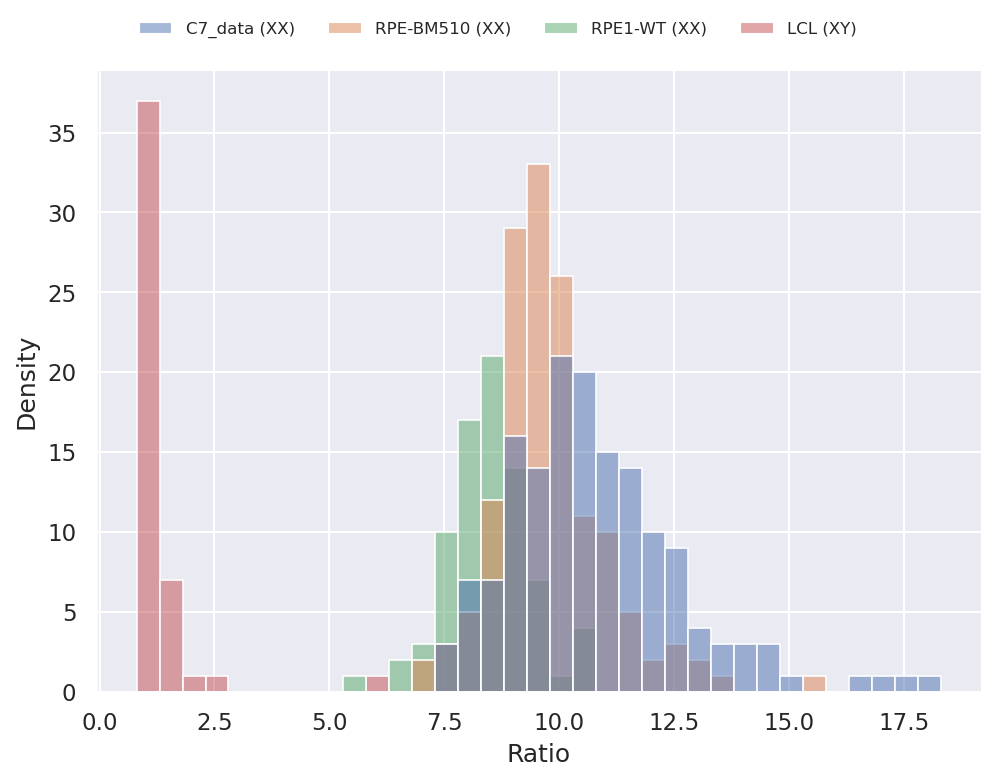

In [4]:
%matplotlib inline
sns.set_theme()
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 150
#plt.figure(figsize=(30,30))
g = sns.displot(df.sort_values(by="XX/XY"), x="chrX/chrY coverage ratio", hue="Sample", binwidth=0.5)



sns.move_legend(
    g, "upper center",
    ncol=4, title=None, frameon=False, fontsize=8, bbox_to_anchor=(0.5, 1.05)
)
plt.xlabel("Ratio")
plt.ylabel("Density")
plt.tight_layout()

In [16]:
l_wc = [
    "/g/korbel2/weber/MosaiCatcher_output/MosaiCatcher_output_ENA_example_full/counts/C7_data/C7_data.txt.gz",
    "/g/korbel2/weber/MosaiCatcher_output/MosaiCatcher_output_ENA_example_full/counts/RPE-BM510/RPE-BM510.txt.gz",
    "/g/korbel2/weber/MosaiCatcher_output/MosaiCatcher_output_ENA_example_full/counts/RPE1-WT/RPE1-WT.txt.gz",
    "/g/korbel2/weber/MosaiCatcher_output/Mosaicatcher_output_singularity_LCL/counts/H2NCTAFX2_GM20509B_20s000579-1-1/H2NCTAFX2_GM20509B_20s000579-1-1.txt.gz"
]

l_df = pd.concat([pd.read_csv(file, sep="\t", compression='gzip') for file in l_wc])
l_df



,chrom,start,end,sample,cell,c,w,class
0,chr1,0,100000,C7_data,C7x02PE20301,1,1,WW
1,chr1,100000,200000,C7_data,C7x02PE20301,0,3,WW
2,chr1,200000,300000,C7_data,C7x02PE20301,0,0,WW
3,chr1,300000,400000,C7_data,C7x02PE20301,0,0,WW
4,chr1,400000,500000,C7_data,C7x02PE20301,0,0,WW
...,...,...,...,...,...,...,...,...
1425082,chrX,155600000,155700000,H2NCTAFX2_GM20509B_20s000579-1-1,GM20509Bx01PE20589,0,4,WW
1425083,chrX,155700000,155800000,H2NCTAFX2_GM20509B_20s000579-1-1,GM20509Bx01PE20589,3,4,WW
1425084,chrX,155800000,155900000,H2NCTAFX2_GM20509B_20s000579-1-1,GM20509Bx01PE20589,3,5,WW
1425085,chrX,155900000,156000000,H2NCTAFX2_GM20509B_20s000579-1-1,GM20509Bx01PE20589,5,4,WW


In [33]:
stats_df = l_df.groupby(["sample", "cell", "chrom"])["class"].value_counts().rename("count").reset_index()
stats_df_xy = stats_df.loc[(stats_df["chrom"].isin(["chrX", "chrY"])) ]
stats_df_xy["XX/XY"] = stats_df_xy["sample"].map(d_xy)
stats_df_xy["sample"] = stats_df_xy["sample"].replace("H2NCTAFX2_GM20509B_20s000579-1-1", "LCL")
stats_df_xy["sample"] = stats_df_xy["sample"] + " (" + stats_df_xy["XX/XY"] + ")"
stats_df_xy

,sample,cell,chrom,class,count,XX/XY
41,C7_data (XX),C7x02PE20301,chrX,CC,1561,XX
76,C7_data (XX),C7x02PE20302,chrX,WW,1561,XX
113,C7_data (XX),C7x02PE20303,chrX,CC,1561,XX
154,C7_data (XX),C7x02PE20304,chrX,WC,1557,XX
155,C7_data (XX),C7x02PE20304,chrX,CC,4,XX
...,...,...,...,...,...,...
16526,RPE1-WT (XX),RPE1WTPE20492,chrX,WC,1561,XX
16558,RPE1-WT (XX),RPE1WTPE20493,chrX,WC,1561,XX
16596,RPE1-WT (XX),RPE1WTPE20494,chrX,WC,1556,XX
16597,RPE1-WT (XX),RPE1WTPE20494,chrX,WW,5,XX


In [34]:
stats_df_xy.groupby("sample").describe()

count                                                      \
                count        mean         std  min    25%     50%     75%   
sample                                                                      
C7_data (XX)    248.0  969.330645  675.143568  2.0   40.0  1516.0  1561.0   
LCL (XY)         96.0  764.239583  705.987159  2.0   28.0   692.0  1533.0   
RPE-BM510 (XX)  240.0  936.600000  690.518541  2.0   38.0  1429.0  1561.0   
RPE1-WT (XX)    127.0  983.307087  664.185138  2.0  196.0  1438.0  1561.0   

                        
                   max  
sample                  
C7_data (XX)    1561.0  
LCL (XY)        1561.0  
RPE-BM510 (XX)  1561.0  
RPE1-WT (XX)    1561.0

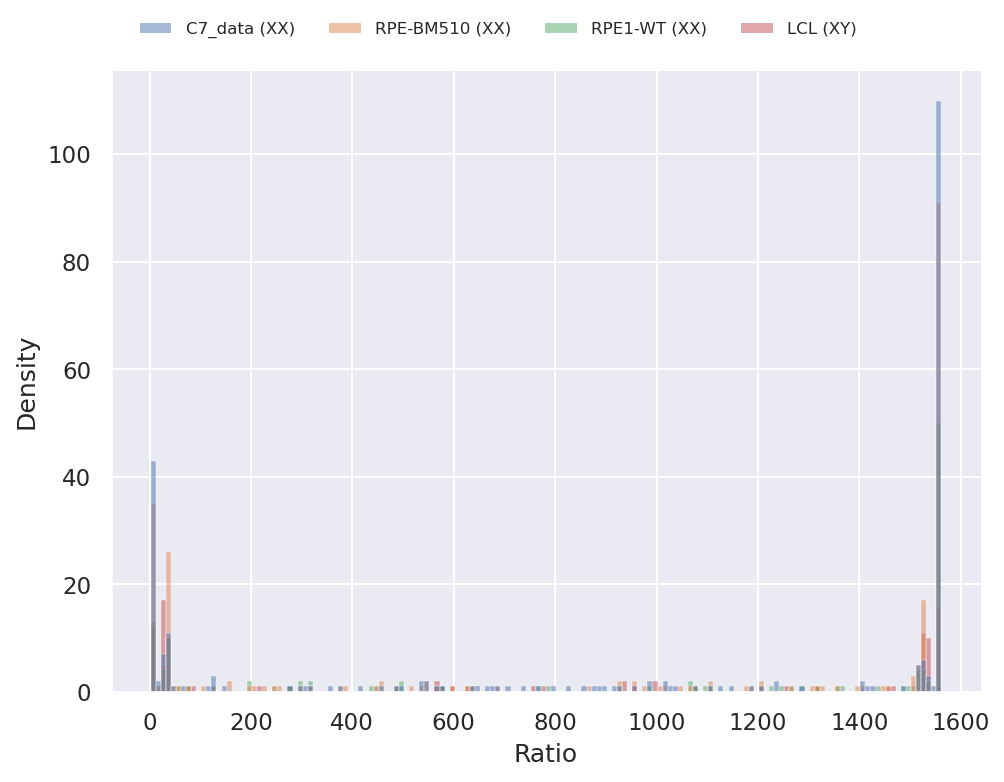

In [35]:
%matplotlib inline
sns.set_theme()
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 150
#plt.figure(figsize=(30,30))
g = sns.displot(stats_df_xy.sort_values(by="XX/XY"), x="count", hue="sample", binwidth=10)



sns.move_legend(
    g, "upper center",
    ncol=4, title=None, frameon=False, fontsize=8, bbox_to_anchor=(0.5, 1.05)
)
plt.xlabel("Ratio")
plt.ylabel("Density")
plt.tight_layout()

[Text(0, 0, 'C7_data (XX)'),
 Text(1, 0, 'RPE-BM510 (XX)'),
 Text(2, 0, 'RPE1-WT (XX)'),
 Text(3, 0, 'LCL (XY)')]

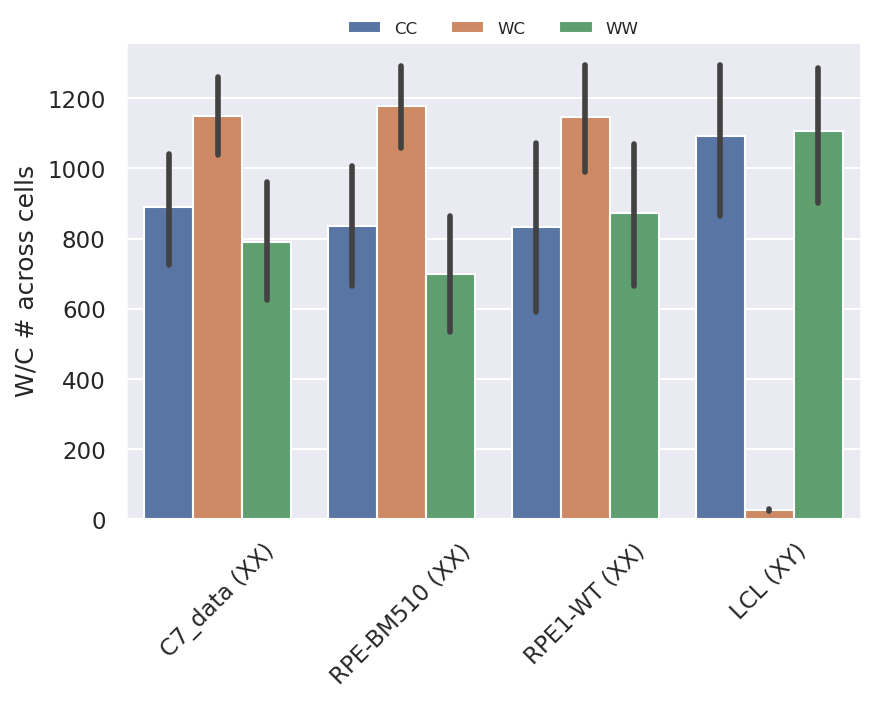

In [40]:
%matplotlib inline
sns.set_theme()
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 150
#plt.figure(figsize=(30,30))
g = sns.barplot(data=stats_df_xy.sort_values(by="XX/XY"), x="sample", y="count", hue="class")

sns.move_legend(
    g, "upper center",
    ncol=4, title=None, frameon=False, fontsize=8, bbox_to_anchor=(0.5, 1.075)
)
plt.xlabel("")
plt.ylabel("W/C # across cells")
plt.tight_layout()
g.set_xticklabels(labels=g.get_xticklabels(), rotation=45)